In [14]:
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()
data.target[[10, 50, 85]]

list(data)

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [11]:
X = pd.DataFrame(data.data, columns = data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [12]:
Y = pd.Series(data.target)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=0)

In [16]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98245614035087714

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

In [44]:
moons = make_moons(noise=0.3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    moons[0], moons[1], test_size=0.1, random_state=0)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.90000000000000002

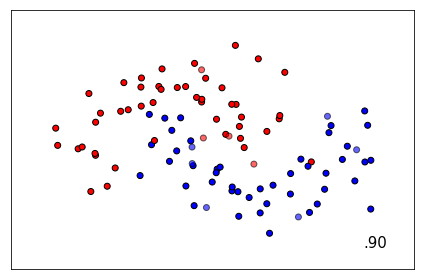

In [45]:
X = moons[0]
y = moons[1]
h = .02 

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

figure = plt.figure()
i = 1
name = 'AdaBoost'
ax = plt.subplot()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')
i += 1

plt.tight_layout()
plt.show()

In [32]:
moons[1]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0])

In [43]:
clf.decision_function(X)

array([-0.4453661 ,  1.2052616 ,  0.49213988,  0.62062054,  0.49213988,
        0.39797914, -0.41176868,  0.49213988,  0.28402184,  0.30262128,
        0.28702096,  1.2052616 ,  0.76387891, -1.04972322, -0.31972163,
       -0.53763379, -0.6905271 , -0.6905271 , -0.85409084, -0.35736686,
       -1.25849622,  0.85133599, -1.01207798,  0.52978511, -0.45121376,
       -0.45121376, -0.41176868,  0.72938515,  0.42897822,  0.76387891,
        0.52978511,  0.49213988,  0.72938515,  0.85133599,  0.28921453,
       -0.85409084, -0.4453661 ,  0.32021361,  0.31802004,  0.49213988,
       -0.2663976 ,  0.52978511, -0.99373429, -1.22749713, -0.41050043,
       -1.04972322, -1.01207798, -0.53763379, -1.22749713, -0.2841435 ,
        0.28800247,  1.00422931, -0.35736686, -1.99307685, -0.0902178 ,
        0.32021361, -1.01207798, -0.25378154, -0.6905271 ,  0.28921453,
       -1.01207798, -0.53763379,  1.09649699,  1.09649699,  0.52978511,
        0.49213988, -0.85409084,  1.2052616 , -0.31514258,  1.20

In [62]:
X = moons[0]
y = moons[1]
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [57]:
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [60]:
X[:, 1]

array([ 0.98698776, -0.04624397, -0.07575606, -0.03733246, -0.53932149,
        0.66208353,  0.33744136, -0.75307471,  0.39287336,  0.36069454,
        0.61420539, -0.3091496 , -0.74636376,  1.19793017,  0.54703192,
        1.11971633,  1.23315697,  0.82373935,  0.77876034,  0.55290238,
        0.6572361 , -0.1951543 ,  0.75287685, -0.45892444, -0.12944211,
       -0.3829632 ,  0.31252842, -0.02291747,  0.17247329, -0.10517023,
       -0.14575067, -1.03570207, -0.01107874, -0.32478101,  0.56648467,
        1.00215131,  1.00062892,  0.24717743,  0.19317272, -0.62574566,
       -0.04515581, -0.39369468,  0.0465662 ,  0.13666025,  0.37782458,
        1.38517841,  1.57189931,  0.72886601,  0.16190215,  0.15375803,
       -0.00705701, -0.23488747,  0.44721658,  0.67869095,  0.28668667,
        0.16085107,  0.98300993,  0.25160139,  1.32217183,  0.56178326,
        0.75444825,  0.99291317, -0.09767143, -0.3796549 , -0.79994161,
       -0.36841845,  0.96158657, -0.62984517,  0.57661371, -0.69

In [64]:
yy

array([], shape=(0, 0), dtype=float64)

In [66]:
!pip3 install xgboost

    100% |████████████████████████████████| 460kB 151kB/s ta 0:00:01
    Complete output from command python setup.py egg_info:
    ++ pwd
    + oldpath=/private/var/folders/t1/b0xd3vd50fj6kmnnqs96f_vr0000gn/T/pip-build-so3mjnzi/xgboost
    + cd ./xgboost/
    + [[ darwin17 == \d\a\r\w\i\n* ]]
    + LIB_XGBOOST=libxgboost.dylib
    + make lib/libxgboost.dylib -j4
    Makefile:31: MAKE [/Applications/Xcode.app/Contents/Developer/usr/bin/make] - checked OK
    c++ -std=c++11 -Wall -Wno-unknown-pragmas -Iinclude   -I/private/var/folders/t1/b0xd3vd50fj6kmnnqs96f_vr0000gn/T/pip-build-so3mjnzi/xgboost/xgboost/dmlc-core/include -Irabit/include -I/include -O3 -funroll-loops -msse2 -fPIC -fopenmp -MM -MT build/logging.o src/logging.cc >build/logging.d
    c++ -std=c++11 -Wall -Wno-unknown-pragmas -Iinclude   -I/private/var/folders/t1/b0xd3vd50fj6kmnnqs96f_vr0000gn/T/pip-build-so3mjnzi/xgboost/xgboost/dmlc-core/include -Irabit/include -I/include -O3 -funroll-loops -msse2 -fPIC -fopenmp -MM -MT b

In [68]:
from catboost import CatBoostClassifier